# Result visualization of Multiple telescopes scheduling

In [290]:
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [291]:
def data_reader(file_dir, length):
    col_names = ['No', 'Duration', 'Slew time', 'Wait time', 'Obs time', 'Rel slew', 'Rel wait', 'Rel obs', 'Max attempts',
             'Times max att', 'Obs result 1', 'Obs result 2', 'Obs result 3', 'Obs result 4', 'Interruption 1', 'Interruption 2']
    data = pd.read_csv(file_dir, names=col_names)
    data = data.to_numpy()
    return data[length,:]

## Dataset 1

In [292]:
dataset = 'dataset1'

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [293]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [294]:
policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [295]:
policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [296]:
policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

In [297]:
policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

In [298]:
policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

In [299]:
policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

In [300]:
policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Reschedule Step, 3 telescopes setup')

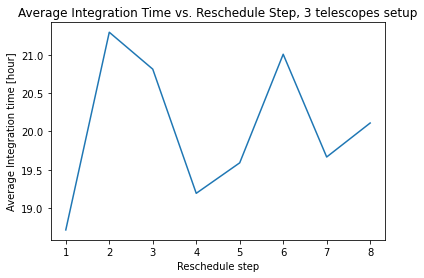

In [301]:
x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

### The number of telescopes analysis

In [302]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,65)).astype(np.float), axis=0)
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Number of Telescopes, Multiple TSP')

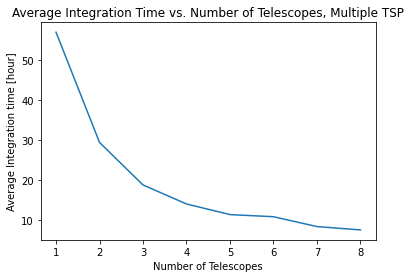

In [303]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
for i in range(8):
    y[i] = tsp_mean[i,1]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, Multiple TSP')

### Preoptimization policy analysis

In [304]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [305]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

3. EarliestSetting

In [306]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

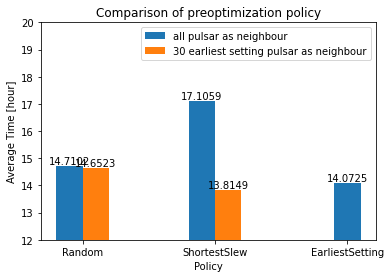

In [307]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]


b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbour")

plt.ylim(12,20)
plt.xticks(range(len(x_data)),x_data)

plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.bar_label(b1)
plt.bar_label(b2)
plt.legend(loc = 'upper right')

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [308]:
policy = 'ShortestSlew30neig'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [309]:
policy = 'Random30neig'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [310]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [311]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

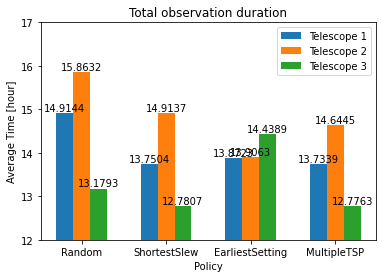

In [312]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(12,17)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

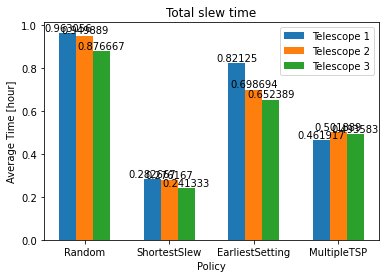

In [313]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")


plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend()

#### Total waiting time

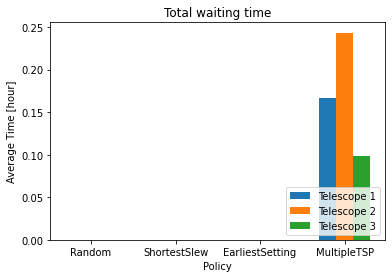

In [314]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

## Dataset 2

In [315]:
dataset = 'dataset2'

### Reschedule step test
Parameters: \
1-8 step: 30 neighbours each time; Multiple tsp polucy; 3 telescopes

In [316]:
policy = '1steptsp3'
step1tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step1tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step1tsp_mean = np.mean(np.mean(step1tsp_data, axis=0), axis=0)

In [317]:
policy = '2steptsp3'
step2tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step2tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step2tsp_mean = np.mean(np.mean(step2tsp_data, axis=0), axis=0)

In [318]:
policy = '3steptsp3'
step3tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step3tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step3tsp_mean = np.mean(np.mean(step3tsp_data, axis=0), axis=0)

In [319]:
policy = '4steptsp3'
step4tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step4tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step4tsp_mean = np.mean(np.mean(step4tsp_data, axis=0), axis=0)

In [320]:
policy = '5steptsp3'
step5tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step5tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step5tsp_mean = np.mean(np.mean(step5tsp_data, axis=0), axis=0)

In [321]:
policy = '6steptsp3'
step6tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step6tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step6tsp_mean = np.mean(np.mean(step6tsp_data, axis=0), axis=0)

In [322]:
policy = '7steptsp3'
step7tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step7tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step7tsp_mean = np.mean(np.mean(step7tsp_data, axis=0), axis=0)

In [323]:
policy = '8steptsp3'
step8tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    step8tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
step8tsp_mean = np.mean(np.mean(step8tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Reschedule Step, 3 telescopes setup')

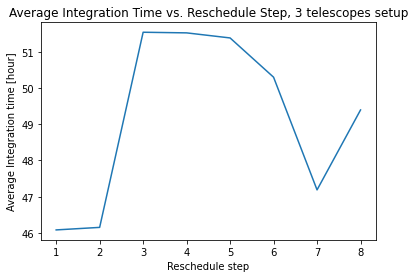

In [324]:
x = [1,2,3,4,5,6,7,8]
y = [step1tsp_mean[1], step2tsp_mean[1], step3tsp_mean[1], step4tsp_mean[1], step5tsp_mean[1], step6tsp_mean[1], step7tsp_mean[1], step8tsp_mean[1]]
    
plt.plot(x,y)

plt.xlabel('Reschedule step')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Reschedule Step, 3 telescopes setup')

### Number of telescopes performance analysis

In [325]:
policy = 'tsp'
tsp_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'tsp1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
tsp_mean[0,:] = np.mean(data_reader(file_dir,range(5,95)).astype(np.float), axis=0)
for j in range(2,9):
    tsp_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        tsp_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    tsp_mean[j-1,:] = np.mean(np.mean(tsp_data, axis=0), axis=0)

Text(0.5, 1.0, 'Average Integration Time vs. Number of Telescopes, Multiple TSP')

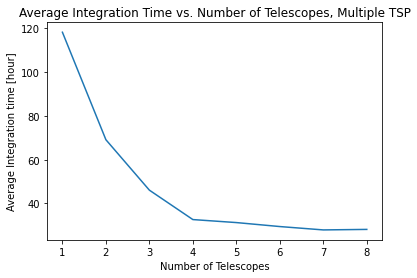

In [326]:
x = [1,2,3,4,5,6,7,8]
y = [1,2,3,4,5,6,7,8]
for i in range(8):
    y[i] = tsp_mean[i,1]
    
plt.plot(x,y)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, Multiple TSP')

### Preoptimization policy analysis

In [327]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
ShortestSlew_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[0] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

policy = 'ShortestSlew30neig'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean[1] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

2. Random policy

In [328]:
policy = 'Random4tele'
Random_data = np.zeros([10, 3, 16])
Random_mean = [1,2]
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[0] = np.mean(np.mean(Random_data, axis=0), axis=0)

policy = 'Random30neig'
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean[1] = np.mean(np.mean(Random_data, axis=0), axis=0)

3. EarliestSetting

In [329]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(np.mean(EarliestSetting_data, axis=0),axis=0)

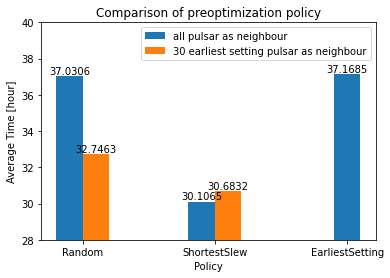

In [330]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting']
x2_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x2_width]
x1_width[2] = x2_width[2]
x3_width = [i+0.1 for i in x2_width]

y_1 = [Random_mean[0][1], ShortestSlew_mean[0][1], EarliestSetting_mean[1]]
y_2 = [Random_mean[1][1], ShortestSlew_mean[1][1]]


b1=plt.bar(x1_width,y_1,width=0.2,label="all pulsar as neighbour")
b2=plt.bar(x3_width[0:len(x_data)-1],y_2,width=0.2,label="30 earliest setting pulsar as neighbour")

plt.ylim(28,40)
plt.xticks(range(len(x_data)),x_data)

plt.title("Comparison of preoptimization policy")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.bar_label(b1)
plt.bar_label(b2)
plt.legend(loc = 'upper right')

### Policy performance analysis using 4 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [331]:
policy = 'ShortestSlew4tele'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [332]:
policy = 'Random30neig'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [333]:
policy = 'EarliestSetting4tele'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [334]:
policy = 'tsp4'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

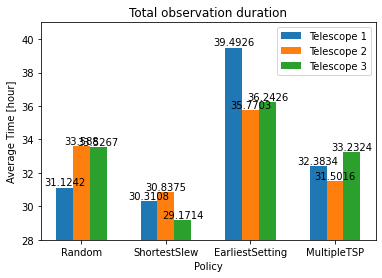

In [335]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.ylim(28,41)

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'upper right')

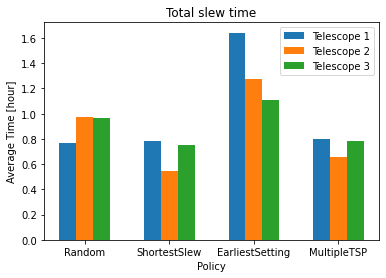

In [336]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

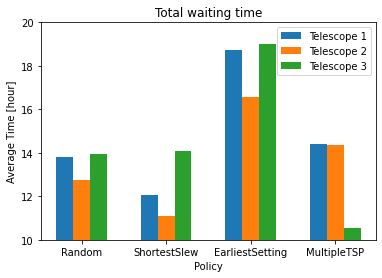

In [340]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")
plt.ylim(10,20)
plt.legend(loc = 'upper right')

# aaaa

#### Simple ShortestSlew policy

In [27]:
policy = 'ShortestSlew'
ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ 'ShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

In [28]:
policy = '10neigShortestSlew'
neig10ShortestSlew_mean = np.zeros([8, 16])

file_dir = 'results/'+dataset+'/'+ '10neigShortestSlew1' + '/' + 'batch_2017_3_21_13_0_0_.csv'
neig10ShortestSlew_mean[0,:] = np.mean(data_reader(file_dir,range(5,15)).astype(np.float), axis=0)
for j in range(2,9):
    ShortestSlew_data = np.zeros([10, j, 16])
    for i in range(10):
        file_dir = 'results/'+dataset+'/'+ policy + str(j) + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
        ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,5+j))
    neig10ShortestSlew_mean[j-1,:] = np.mean(np.mean(ShortestSlew_data, axis=0), axis=0)

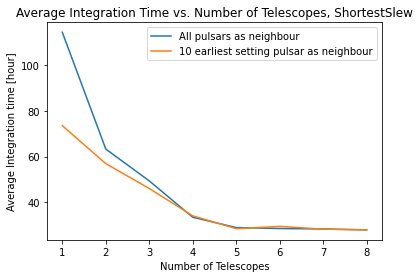

In [29]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,1]
    y2[i] = neig10ShortestSlew_mean[i,1]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average Integration time [hour]')

plt.title('Average Integration Time vs. Number of Telescopes, ShortestSlew')

plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

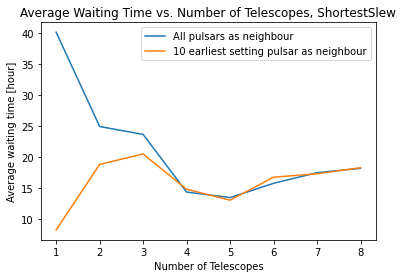

In [30]:
x = [1,2,3,4,5,6,7,8]
y1 = [1,2,3,4,5,6,7,8]
y2 = [1,2,3,4,5,6,7,8]
for i in range(8):
    y1[i] = ShortestSlew_mean[i,3]
    y2[i] = neig10ShortestSlew_mean[i,3]
    
plt.plot(x,y1)
plt.plot(x,y2)

plt.xlabel('Number of Telescopes')

plt.ylabel('Average waiting time [hour]')

plt.title('Average Waiting Time vs. Number of Telescopes, ShortestSlew')
plt.legend(loc = 'best',labels = ['All pulsars as neighbour','10 earliest setting pulsar as neighbour'])

### Policy performance analysis using 3 telescopes test case
#### Data import
1. Simple ShortestSlew policy

In [16]:
policy = 'ShortestSlew3'
ShortestSlew_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    ShortestSlew_data[i,:,:] = data_reader(file_dir,range(5,8))
    
ShortestSlew_mean = np.mean(ShortestSlew_data, axis=0)

2. Random policy

In [17]:
policy = 'Random'
Random_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    Random_data[i,:,:] = data_reader(file_dir,range(5,8))
    
Random_mean = np.mean(Random_data, axis=0)

3. EarliestSetting

In [18]:
policy = 'EarliestSetting'
EarliestSetting_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    EarliestSetting_data[i,:,:] = data_reader(file_dir,range(5,8))
    
EarliestSetting_mean = np.mean(EarliestSetting_data, axis=0)

4. MultipleTSP 

In [19]:
policy = 'tsp3'
tsp_data = np.zeros([10, 3, 16])
for i in range(10):
    file_dir = 'results/'+dataset+'/'+ policy + '/' + 'batch_'+ str(i) +'_2017_3_21_13_0_0_.csv'
    tsp_data[i,:,:] = data_reader(file_dir,range(5,8))
    
tsp_mean = np.mean(tsp_data, axis=0)

#### Total observation duration

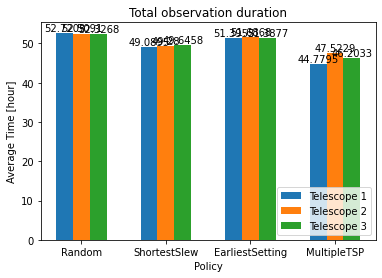

In [24]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,1], ShortestSlew_mean[0,1], EarliestSetting_mean[0,1], tsp_mean[0,1]]
y_2 = [Random_mean[1,1], ShortestSlew_mean[1,1], EarliestSetting_mean[1,1], tsp_mean[1,1]]
y_3 = [Random_mean[2,1], ShortestSlew_mean[2,1], EarliestSetting_mean[2,1], tsp_mean[2,1]]

b1=plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
b2=plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
b3=plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total observation duration")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.bar_label(b1)
plt.bar_label(b2)
plt.bar_label(b3)
plt.legend(loc = 'lower right')

#### Total slew time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,2], ShortestSlew_mean[0,2], EarliestSetting_mean[0,2], tsp_mean[0,2]]
y_2 = [Random_mean[1,2], ShortestSlew_mean[1,2], EarliestSetting_mean[1,2], tsp_mean[1,2]]
y_3 = [Random_mean[2,2], ShortestSlew_mean[2,2], EarliestSetting_mean[2,2], tsp_mean[2,2]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total slew time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend()

#### Total waiting time

In [ ]:
x_data = ['Random', 'ShortestSlew', 'EarliestSetting', 'MultipleTSP']
x2_width = range(0,len(x_data))
x1_width = [i-0.2 for i in x2_width]
x3_width = [i+0.2 for i in x2_width]

y_1 = [Random_mean[0,3], ShortestSlew_mean[0,3], EarliestSetting_mean[0,3], tsp_mean[0,3]]
y_2 = [Random_mean[1,3], ShortestSlew_mean[1,3], EarliestSetting_mean[1,3], tsp_mean[1,3]]
y_3 = [Random_mean[2,3], ShortestSlew_mean[2,3], EarliestSetting_mean[2,3], tsp_mean[2,3]]

plt.bar(x1_width,y_1,width=0.2,label="Telescope 1")
plt.bar(x2_width,y_2,width=0.2,label="Telescope 2")
plt.bar(x3_width,y_3,width=0.2,label="Telescope 3")

plt.xticks(range(len(x_data)),x_data)

plt.title("Total waiting time")
plt.xlabel("Policy")
plt.ylabel("Average Time [hour]")

plt.legend(loc = 'lower right')

### The main influencing factor analysis of observation time
#### ShortestSlew Policy

In [ ]:
telescope_mean = np.mean(ShortestSlew_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with shortestslew policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

#### MultipleTSP Policy

In [ ]:
telescope_mean = np.mean(tsp_data, axis = 1)

x_data = [1,2,3,4,5,6,7,8,9,10]
y_total = [1,2,3,4,5,6,7,8,9,10]
y_slew = [1,2,3,4,5,6,7,8,9,10]
y_wait = [1,2,3,4,5,6,7,8,9,10]
y_obs = [1,2,3,4,5,6,7,8,9,10]
for i in range(0,10):
    y_total[i] = telescope_mean[i,1]
    y_slew[i] = telescope_mean[i,2]
    y_wait[i] = telescope_mean[i,3]
    y_obs[i] = telescope_mean[i,4]
    
x0_width = range(0,len(x_data))
x1_width = [i-0.1 for i in x0_width]
x2_width = [i+0.1 for i in x0_width]

plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_wait,width=0.2,label="waiting time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and waiting time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')

In [ ]:
plt.bar(x1_width,y_total,width=0.2,label="Total Integration time")
plt.bar(x2_width,y_obs,width=0.2,label="Observation time")

plt.xticks(range(len(x_data)),x_data)

plt.title("relationship between total time and Observation time with MultipleTSP policy")
plt.xlabel("Test batch")
plt.ylabel("Time [hour]")

plt.legend(loc = 'lower right')